# Bayesian Optimization - the simplest cases

In [1]:
import scipy as sc
import matplotlib.pyplot as pl
import seaborn as sns

from bopt import expected_improvement, bayes_opt
from sklearn.gaussian_process import GaussianProcessRegressor as gp

flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.set_style("white")

In this notebook, I apply B-OPT to the simplest of cases, using "expected improvement" as the acquisition function. 

The first example is the function $$f(x)=\cos(x)|x|.$$ 

This is an oscillatory function with slowly-increasing amplitude. We are only interested in the maximum in the interval $[-10,10]$ and so we focus there. Can we find the max with only four evaluations?

The best estimate for the max value = 4.939901546305142
sc.minimize_scalar returns: 6.361003944832646
error = 1.4211023985275038


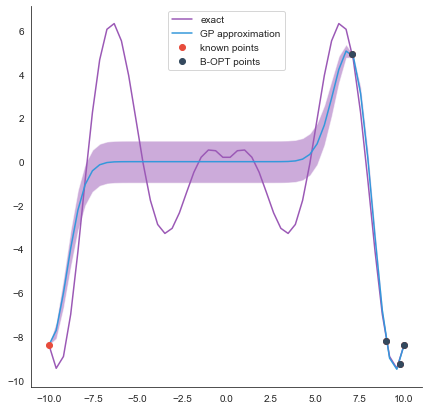

In [4]:
known_points = sc.array([-10.0])


def f(y):
    return sc.cos(y)*abs(y)

running_max, kp, y, model = bayes_opt(known_points,f,4, bounds=(-10,10))

x = sc.linspace(-10,10)

pl.figure(figsize=(7,7))
pl.plot(x,f(x),label='exact')

yv, std = model.predict(x.reshape(-1,1), return_std=True)

pl.plot(x,yv, label='GP approximation')
pl.plot(kp, f(kp),'o',label='known points')
pl.fill_between(x,yv-0.96*std, yv+0.96*std, alpha=0.5)
pl.plot(kp[1:],f(kp[1:]),'o', label='B-OPT points')

pl.legend(loc=0)

print(f'The best estimate for the max value = {running_max}')

g = lambda x: -f(x)
max_value = sc.optimize.minimize_scalar(g,bounds=(-10,10), method="Bounded")
max_value = -max_value['fun']

print(f'sc.minimize_scalar returns: {max_value}')
print(f'error = {max_value-running_max}')
sns.despine()


Yay! Both B-OPT and minimize() get approximately the same answer. 

Next example is $$0.3e^{-(y-2)^2}+0.7e^{-3(y-7)^2}.$$ 

This function has two nice peaks. Will B-OPT find its way to the right optimum with only four evaluations?

The best estimate for the max value = 0.5482024066853892
sc.minimize_scalar returns: 0.2999999999998246
error = -0.24820240668556465


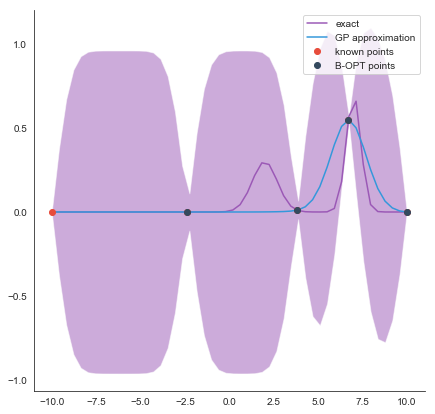

In [3]:
known_points = sc.array([-10.0])


def f(y):
    return sc.exp(-(y-2)**2)*0.3+ 0.7*sc.exp(-(y-7)**2*3)

running_max, kp, y, model = bayes_opt(known_points,f,4, bounds=(-10,10))

x = sc.linspace(-10,10)

pl.figure(figsize=(7,7))
pl.plot(x,f(x),label='exact')

yv, std = model.predict(x.reshape(-1,1), return_std=True)

pl.plot(x,yv, label='GP approximation')
pl.plot(kp, f(kp),'o',label='known points')
pl.fill_between(x,yv-0.96*std, yv+0.96*std, alpha=0.5)
pl.plot(kp[1:],f(kp[1:]),'o', label='B-OPT points')

pl.legend(loc=0)

print(f'The best estimate for the max value = {running_max}')

g = lambda x: -f(x)
max_value = sc.optimize.minimize_scalar(g,bounds=(-10,10), method="Bounded")
max_value = -max_value['fun']

print(f'sc.minimize_scalar returns: {max_value}')
print(f'error = {max_value-running_max}')
sns.despine()

Looks like we've managed to fool minimize() with that first peak, but B-OPT found its way to the right optimum!

For the last example with deterministic output, we will try a polynomial with multiple zeros in $[-1,1]$. This function should be tough on optimizers that rely on gradient information; after increasing for a while, it then looks like it's almost constant, which dries up any signal a first-order optimizer may use. It will also be hard for bracketing methods as the global optimum is an endpoint of the interval.  

The best estimate for the max value = 0.10208912786823861
sc.minimize_scalar returns: 0.00016313406728960762
error = -0.101925993800949


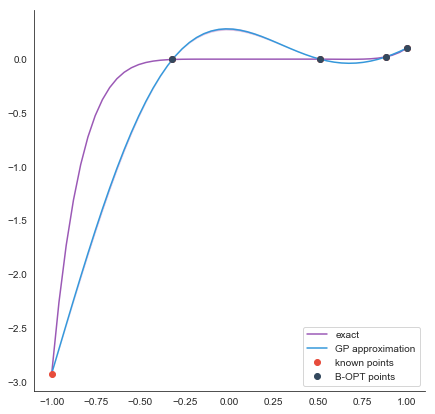

In [4]:
known_points = sc.array([-1])
def f(x):
    return (x - 0.1)*(x-0.75)* (x-0.25)*(x-0.5) * x * (x +0.1)**2

running_max, kp, y, model = bayes_opt(known_points,f,4, bounds=(-1,1))

x = sc.linspace(-1,1)

pl.figure(figsize=(7,7))
pl.plot(x,f(x),label='exact')

yv, std = model.predict(x.reshape(-1,1), return_std=True)

pl.plot(x,yv, label='GP approximation')
pl.plot(kp, f(kp),'o',label='known points')
pl.fill_between(x,yv-0.96*std, yv+0.96*std, alpha=0.5)
pl.plot(kp[1:],f(kp[1:]),'o', label='B-OPT points')

pl.legend(loc=0)

print(f'The best estimate for the max value = {running_max}')

g = lambda x: -f(x)
max_value = sc.optimize.minimize_scalar(g,bounds=(-1,1), method="Bounded")
max_value = -max_value['fun']

print(f'sc.minimize_scalar returns: {max_value}')
print(f'error = {max_value-running_max}')
sns.despine()